#  HEART DIASEASE PREDICTION

In [63]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns

In [64]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [65]:
data = pd.read_csv('heart.csv')

In [66]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [68]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


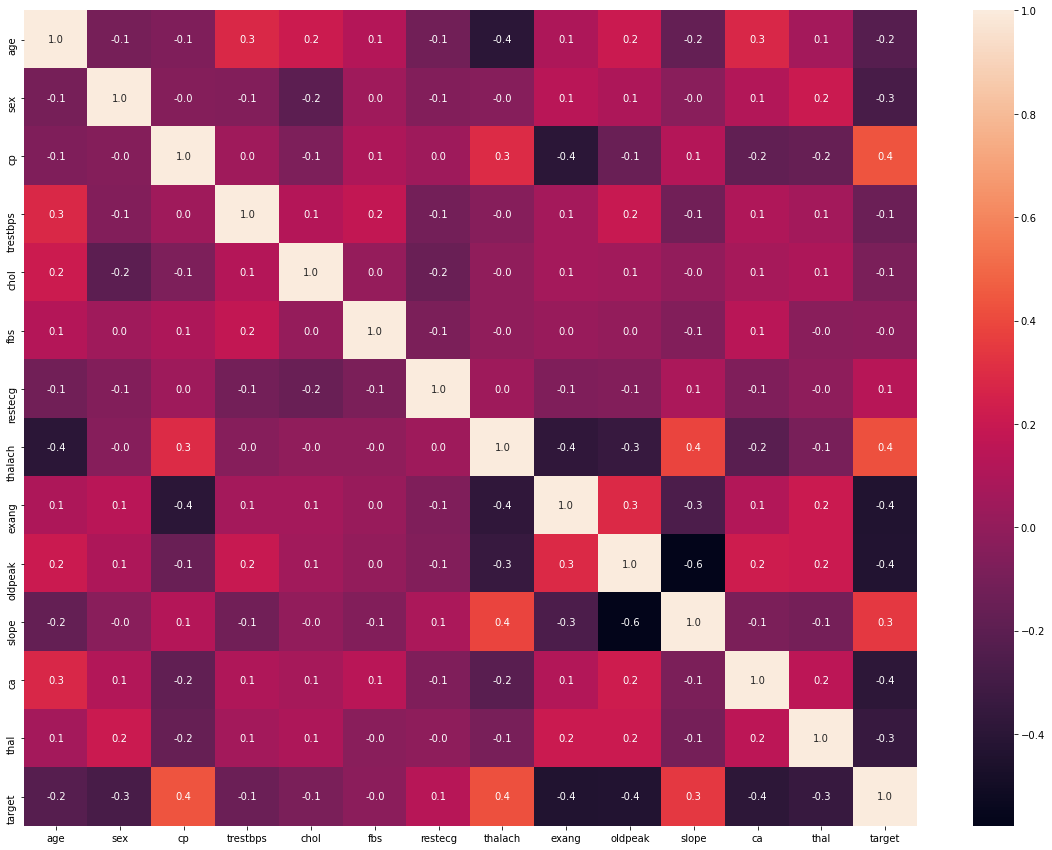

In [69]:
#HEAT MAP
pt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot= True,fmt= '.1f')
pt.show()

In [70]:
#AGE ANALYSIS
data.age.value_counts()[:20]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
Name: age, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

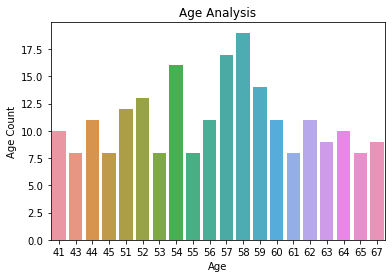

In [71]:
sns.barplot(x= data.age.value_counts()[:20].index, y= data.age.value_counts()[:20].values)
pt.xlabel('Age')
pt.ylabel('Age Count')
pt.title('Age Analysis')
pt.show

In [72]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [73]:
countnoDisease= len(data[data.target==0])
counthaveDisease= len(data[data.target==1])
print ("Percentage of patients donot have Heart disease:{:.2f}%".format((countnoDisease/(len(data.target)))*100))
print ("Percentage of patients have Heart disease:{:.2f}%".format((counthaveDisease/(len(data.target)))*100))

Percentage of patients donot have Heart disease:45.54%
Percentage of patients have Heart disease:54.46%


In [74]:
countFemale= len(data[data.sex==0])
countMale= len(data[data.sex==1])
print ("Percentage of Female patients:[:.2f]%".format((countFemale/(len(data.sex)))*100))
print ("Percentage of Male patients:[:.2f]%".format((countMale/(len(data.sex)))*100))

Percentage of Female patients:[:.2f]%
Percentage of Male patients:[:.2f]%


In [75]:
young_age= data[(data.age>=25)&(data.age<40)]
middle_age= data[(data.age>=40)&(data.age<55)]
elder_age= data[(data.age>=55)&(data.age<60)]
older_age= data[(data.age>60)]

In [76]:
print("Young Age", len(young_age))
print("Middle Age", len(middle_age))
print("Elder Age", len(elder_age))
print("Older Age", len(older_age))

Young Age 16
Middle Age 128
Elder Age 69
Older Age 79


<function matplotlib.pyplot.show(close=None, block=None)>

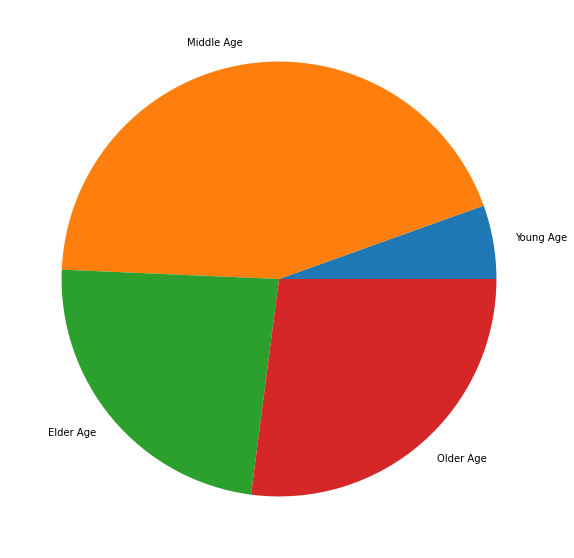

In [77]:
colors= ['green','blue','red','violet']
explode= [1,1,1,1]
pt.figure(figsize= (10,10))
pt.pie([len(young_age),len(middle_age),len(elder_age),len(older_age)], labels= ['Young Age','Middle Age','Elder Age','Older Age'])
pt.show

In [78]:
#CHEST PAIN(cp) ANALYSIS
data.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [79]:
data.target.unique()

array([1, 0], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

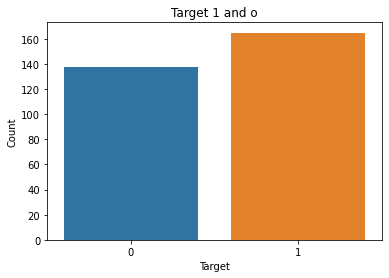

In [80]:
sns.countplot(data.target)
pt.xlabel('Target')
pt.ylabel('Count')
pt.title('Target 1 and o')
pt.show

In [81]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Model builing

In [82]:
from sklearn.linear_model import LogisticRegression
X_data= data.drop(['target'],axis=1)
Y_data= data.target.values

In [83]:
X_train, X_test, Y_train, Y_test= train_test_split(X_data, Y_data, test_size=0.2, random_state= 0)

In [84]:
LR= LogisticRegression()
LR.fit(X_train, Y_train)
print('Test Accuracy {:.2f}%'.format(LR.score(X_test, Y_test)*100))


Test Accuracy 85.25%


Logistic Regression Test Accuracy 85.25%

In [85]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
KNN =  KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, Y_train)
print("KNN accuracy: {:.2f}%".format(KNN.score(X_test, Y_test)*100))

KNN accuracy: 63.93%


In [86]:
# support vector
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, Y_train)
print("SVC accuracy: {:.2f}%".format(svm.score(X_test, Y_test)*100))

SVC accuracy: 68.85%


In [87]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
print("NB accuracy: {:.2f}%".format(nb.score(X_test, Y_test)*100))

NB accuracy: 85.25%


In [88]:
# Random forset

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state= 1)
rf.fit(X_train, Y_train)
print("Random Forest accuracy: {:.2f}%".format(rf.score(X_test, Y_test)*100))

Random Forest accuracy: 85.25%
